6365
c)The azimuthal angle with respect to the initial position is ~32.7 deg
The maximum height reached is 292.9 km 
318.2818281828183
d)The azimuthal angle with respect to the initial position is ~32.7 deg
The maximum height reached is 292.9 km
Non-inertial and inertial results agree (in particular max height and landing azimuthal angle)


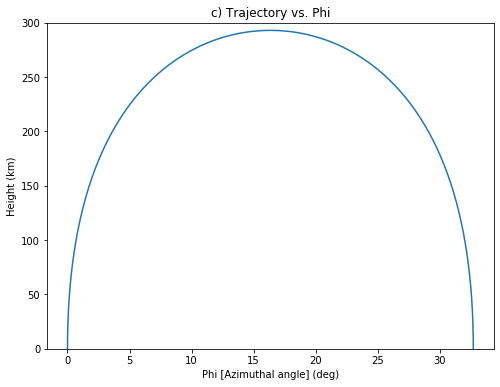

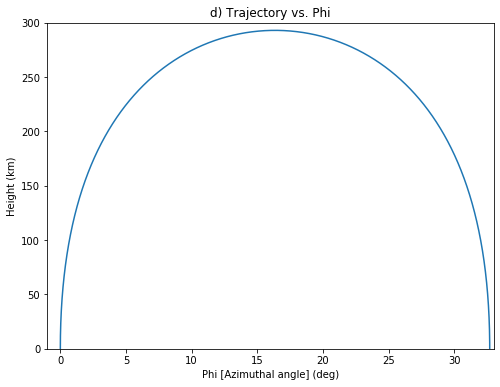

In [69]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

#c)
# the function defining the right-hand sides of the ODEs
def dy_dt(y, t, omega, fcf):
    y1, y2, y3, y4 = y
    #y1 is r and y3 is phi
    # a special care should be taken here
    # to avoid the situation when the denominator y1=0.
    eps = 1e-12
    if abs(y1) < eps:
        y1 = eps
    dydt = [y2, 2.*omega*y1*y4+y1*(fcf*omega**2+y4**2),\
            y4, -(2.*y2/y1)*(omega+y4)]
    return dydt

omega = 0.18*np.pi/180  # angular velocity in rad/s
R = 1000 # in km
fcf = 1. # the centrifugal force is included
y0=[R,-omega*R,0,0]

t_start = 0.
t_end = 500. # adjust t_end using the plot below
nt = 10000 # the number of integration time steps

t = np.linspace(t_start, t_end, nt)
sol = odeint(dy_dt, y0, t, args=(omega,fcf))
r= sol[:,0]
phi= sol[:,2]*180/np.pi
h=R-r

figure(1,figsize=(8,6))
plt.plot(phi,h)
plt.ylim(0,300)
plt.title('c) Trajectory vs. Phi')
plt.ylabel('Height (km)')
plt.xlabel('Phi [Azimuthal angle] (deg)')

for i in np.arange(3,len(phi)):
    if h[i]<0.1:
        print(i)
        break
print('c)The azimuthal angle with respect to the initial position is ~'+str(round(phi[6365],2))+' deg')
print('The maximum height reached is '+str(round(max(h),1))+' km ')

#d)
#landing time:
print(t[6365])
#using simple geometry:
t=np.linspace(0,t[6365],10000)
phi=np.arctan(omega*t/(1-omega*t))-omega*t
phi=phi*180/np.pi
r=R*np.sqrt(1-2*omega*t*(1-omega*t))
h=R-r

figure(2,figsize=(8,6))
plt.plot(phi,h)
plt.ylim(0,300)
plt.xlim(-1,33)
plt.title('d) Trajectory vs. Phi')
plt.ylabel('Height (km)')
plt.xlabel('Phi [Azimuthal angle] (deg)')
print('d)The azimuthal angle with respect to the initial position is ~'+str(round(phi[-1],2))+' deg')
print('The maximum height reached is '+str(round(max(h),1))+' km')
print('Non-inertial and inertial results agree (in particular max height and landing azimuthal angle)')